<a href="https://colab.research.google.com/github/vinaychowdaryk/decisiontree_project/blob/main/DecisionTree_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kyphosis.csv') #kyphosis is a desease(corrective spinal surgery) present in children. Age is in months, number is desease present in no of vertibrae. Start is the first vertibrae surgery started operating on.
#total vertibrae in children is 33 and 26 in adults

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


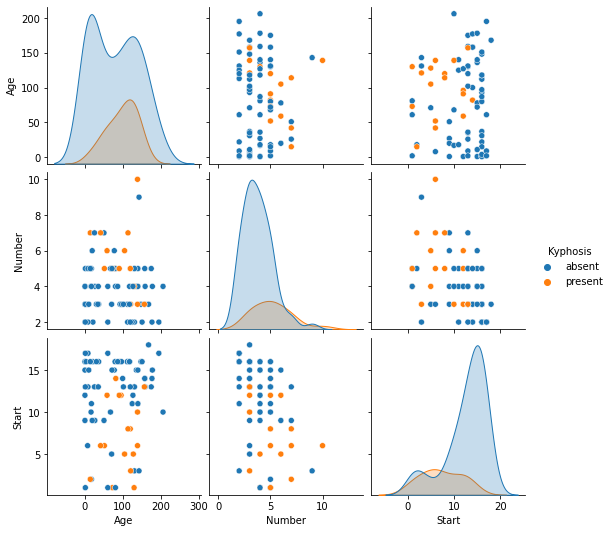

In [8]:
sns.pairplot(df, hue = 'Kyphosis')

Train text split 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('Kyphosis', axis = 1)
y = df['Kyphosis']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.30)

Decision Tress

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree = DecisionTreeClassifier(criterion = 'entropy')

In [14]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

Prediction

In [17]:
predictions = dtree.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(classification_report(y_test,predictions)) #since there are less present values we see f1 score for present is low

              precision    recall  f1-score   support

      absent       0.83      0.79      0.81        19
     present       0.43      0.50      0.46         6

    accuracy                           0.72        25
   macro avg       0.63      0.64      0.64        25
weighted avg       0.74      0.72      0.73        25



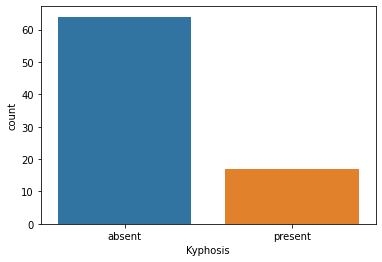

In [23]:
sns.countplot(x = 'Kyphosis', data = df)

In [28]:
print(confusion_matrix(y_test,predictions))

[[15  4]
 [ 3  3]]


*Visualize the Tree*

In [35]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from six import StringIO
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [38]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, feature_names = features, filled = True)

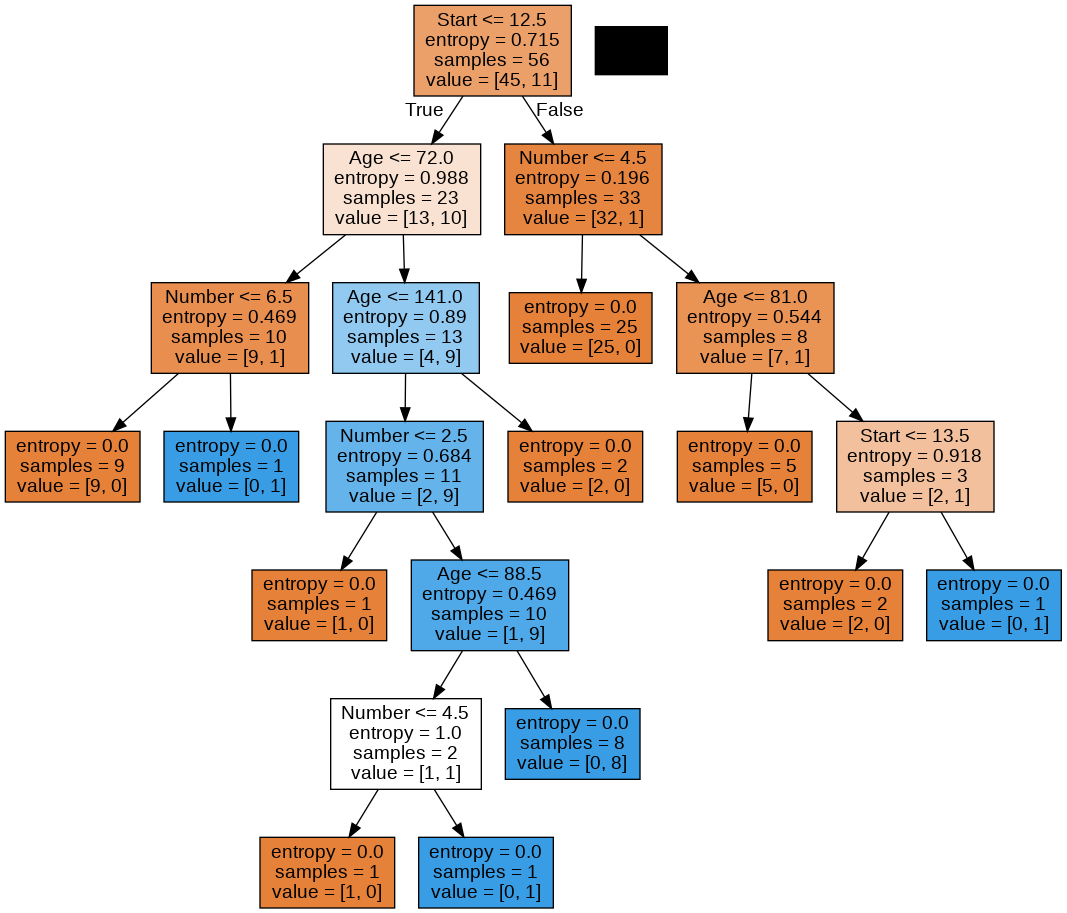

In [40]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc = RandomForestClassifier(n_estimators = 100, criterion= 'entropy')

In [46]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [48]:
rfc_pred = rfc.predict(X_test)

In [49]:
print(confusion_matrix(y_test, rfc_pred)) #in DR there were 8 mistakes but in RF there are only 6 miskates which is better than DT

[[19  0]
 [ 4  2]]


In [50]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.83      1.00      0.90        19
     present       1.00      0.33      0.50         6

    accuracy                           0.84        25
   macro avg       0.91      0.67      0.70        25
weighted avg       0.87      0.84      0.81        25

